In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [3]:
# Load data
data = pd.read_csv('/content/drive/My Drive/Apziva/ACME-HappinessSurvey2020.csv')

In [4]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


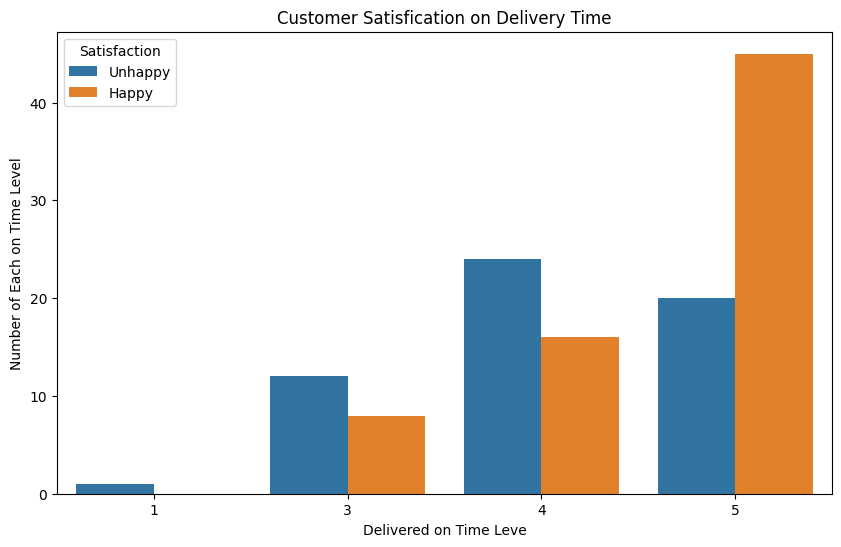

In [6]:
# Bar Plot for single variable X1, how does the deliery time impact customer's satisfication
df1 = data[['Y', 'X1']].value_counts().reset_index()
df1['Y'] = df1['Y'].map({0: 'Unhappy', 1: 'Happy'})
df1.columns = ['Y', 'X1', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X1', y='Count', hue='Y', data=df1)
plt.xlabel('Delivered on Time Leve')
plt.ylabel('Number of Each on Time Level')
plt.title('Customer Satisfication on Delivery Time')
plt.legend(title='Satisfaction')
plt.show()



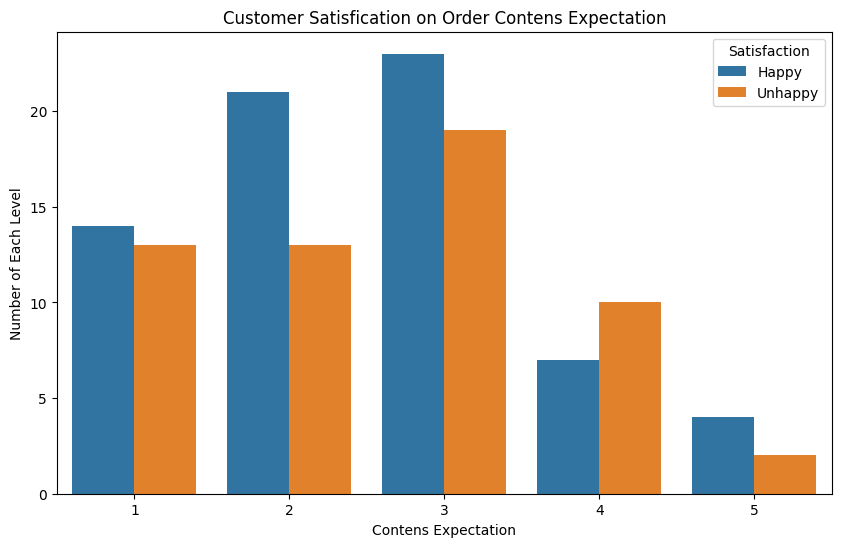

In [7]:
# Bar Plot for single variable for X2, how do the contents of order expectation impact the happiness
df2 = data[['Y', 'X2']].value_counts().reset_index()
df2['Y'] = df2['Y'].map({0: 'Unhappy', 1: 'Happy'})
df2.columns = ['Y', 'X2', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X2', y='Count', hue='Y', data=df2)
plt.xlabel('Contens Expectation')
plt.ylabel('Number of Each Level')
plt.title('Customer Satisfication on Order Contens Expectation')
plt.legend(title='Satisfaction')
plt.show()



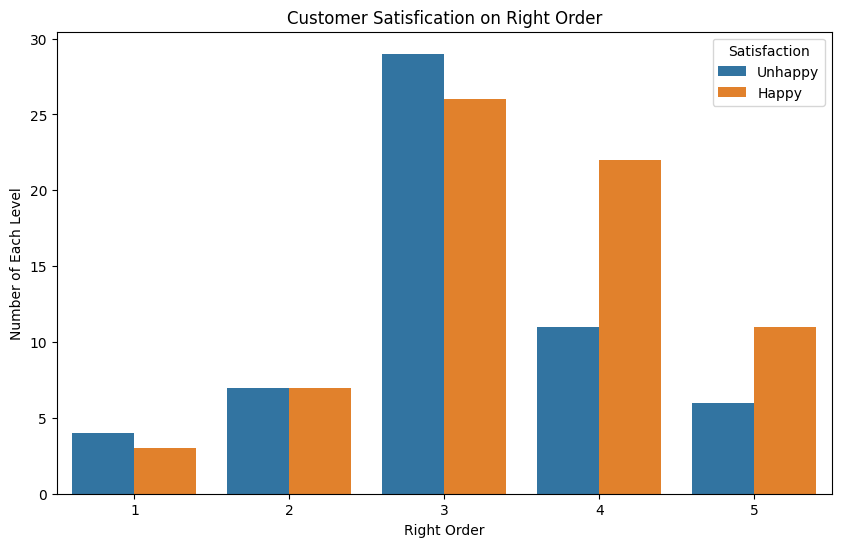

In [8]:
# Bar Plot for single variable for X3, how does right order impact the happiness
df3 = data[['Y', 'X3']].value_counts().reset_index()
df3['Y'] = df3['Y'].map({0: 'Unhappy', 1: 'Happy'})
df3.columns = ['Y', 'X3', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X3', y='Count', hue='Y', data=df3)
plt.xlabel('Right Order')
plt.ylabel('Number of Each Level')
plt.title('Customer Satisfication on Right Order')
plt.legend(title='Satisfaction')
plt.show()



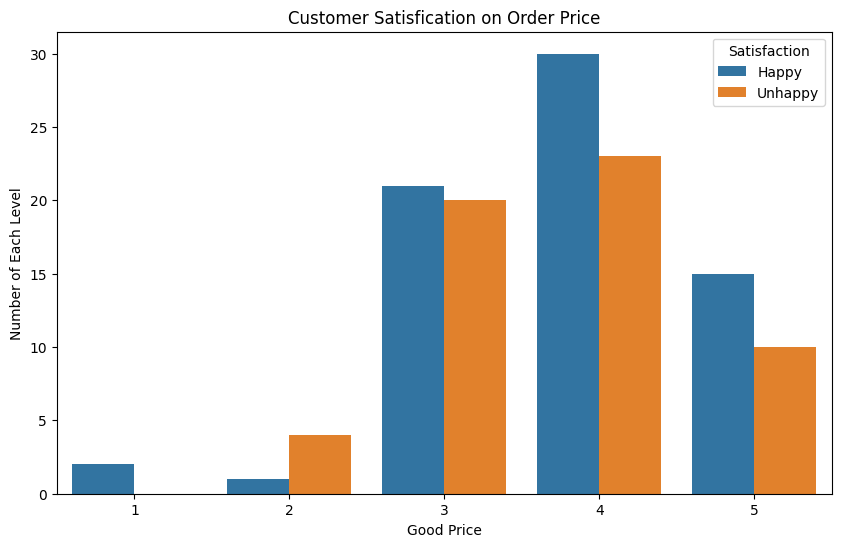

In [9]:
# Bar Plot for single variable for X4, how does order price impact the happiness
df4 = data[['Y', 'X4']].value_counts().reset_index()
df4['Y'] = df4['Y'].map({0: 'Unhappy', 1: 'Happy'})
df4.columns = ['Y', 'X4', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X4', y='Count', hue='Y', data=df4)
plt.xlabel('Good Price')
plt.ylabel('Number of Each Level')
plt.title('Customer Satisfication on Order Price')
plt.legend(title='Satisfaction')
plt.show()



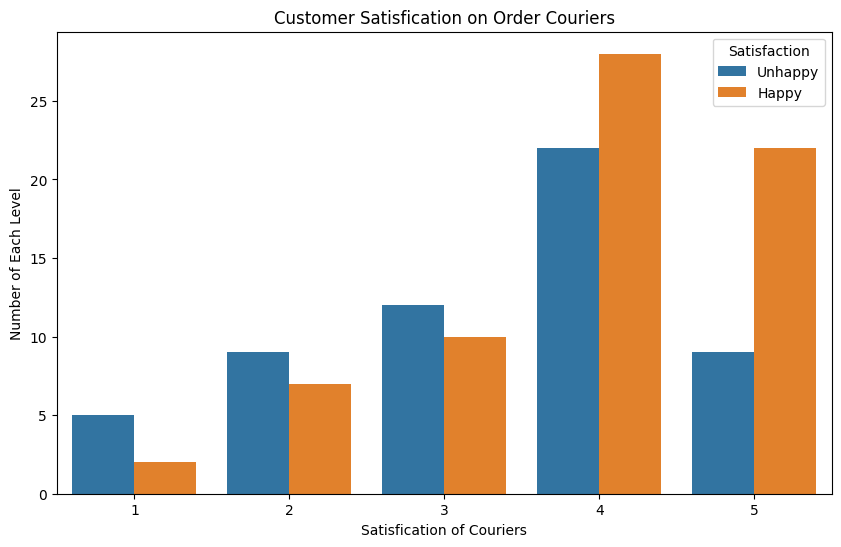

In [10]:
# Bar Plot for single variable for X5, how does satisfication of courier impact the happiness
df5 = data[['Y', 'X5']].value_counts().reset_index()
df5['Y'] = df5['Y'].map({0: 'Unhappy', 1: 'Happy'})
df5.columns = ['Y', 'X5', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X5', y='Count', hue='Y', data=df5)
plt.xlabel('Satisfication of Couriers')
plt.ylabel('Number of Each Level')
plt.title('Customer Satisfication on Order Couriers')
plt.legend(title='Satisfaction')
plt.show()



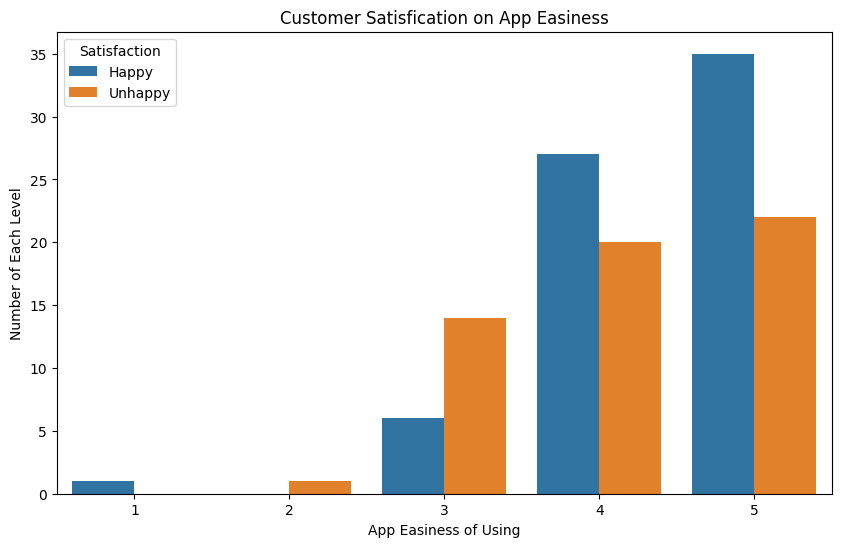

In [11]:
# Bar Plot for single variable for X6, how does the app easiness impact the happiness
df6 = data[['Y', 'X6']].value_counts().reset_index()
df6['Y'] = df6['Y'].map({0: 'Unhappy', 1: 'Happy'})
df6.columns = ['Y', 'X6', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='X6', y='Count', hue='Y', data=df6)
plt.xlabel('App Easiness of Using')
plt.ylabel('Number of Each Level')
plt.title('Customer Satisfication on App Easiness')
plt.legend(title='Satisfaction')
plt.show()



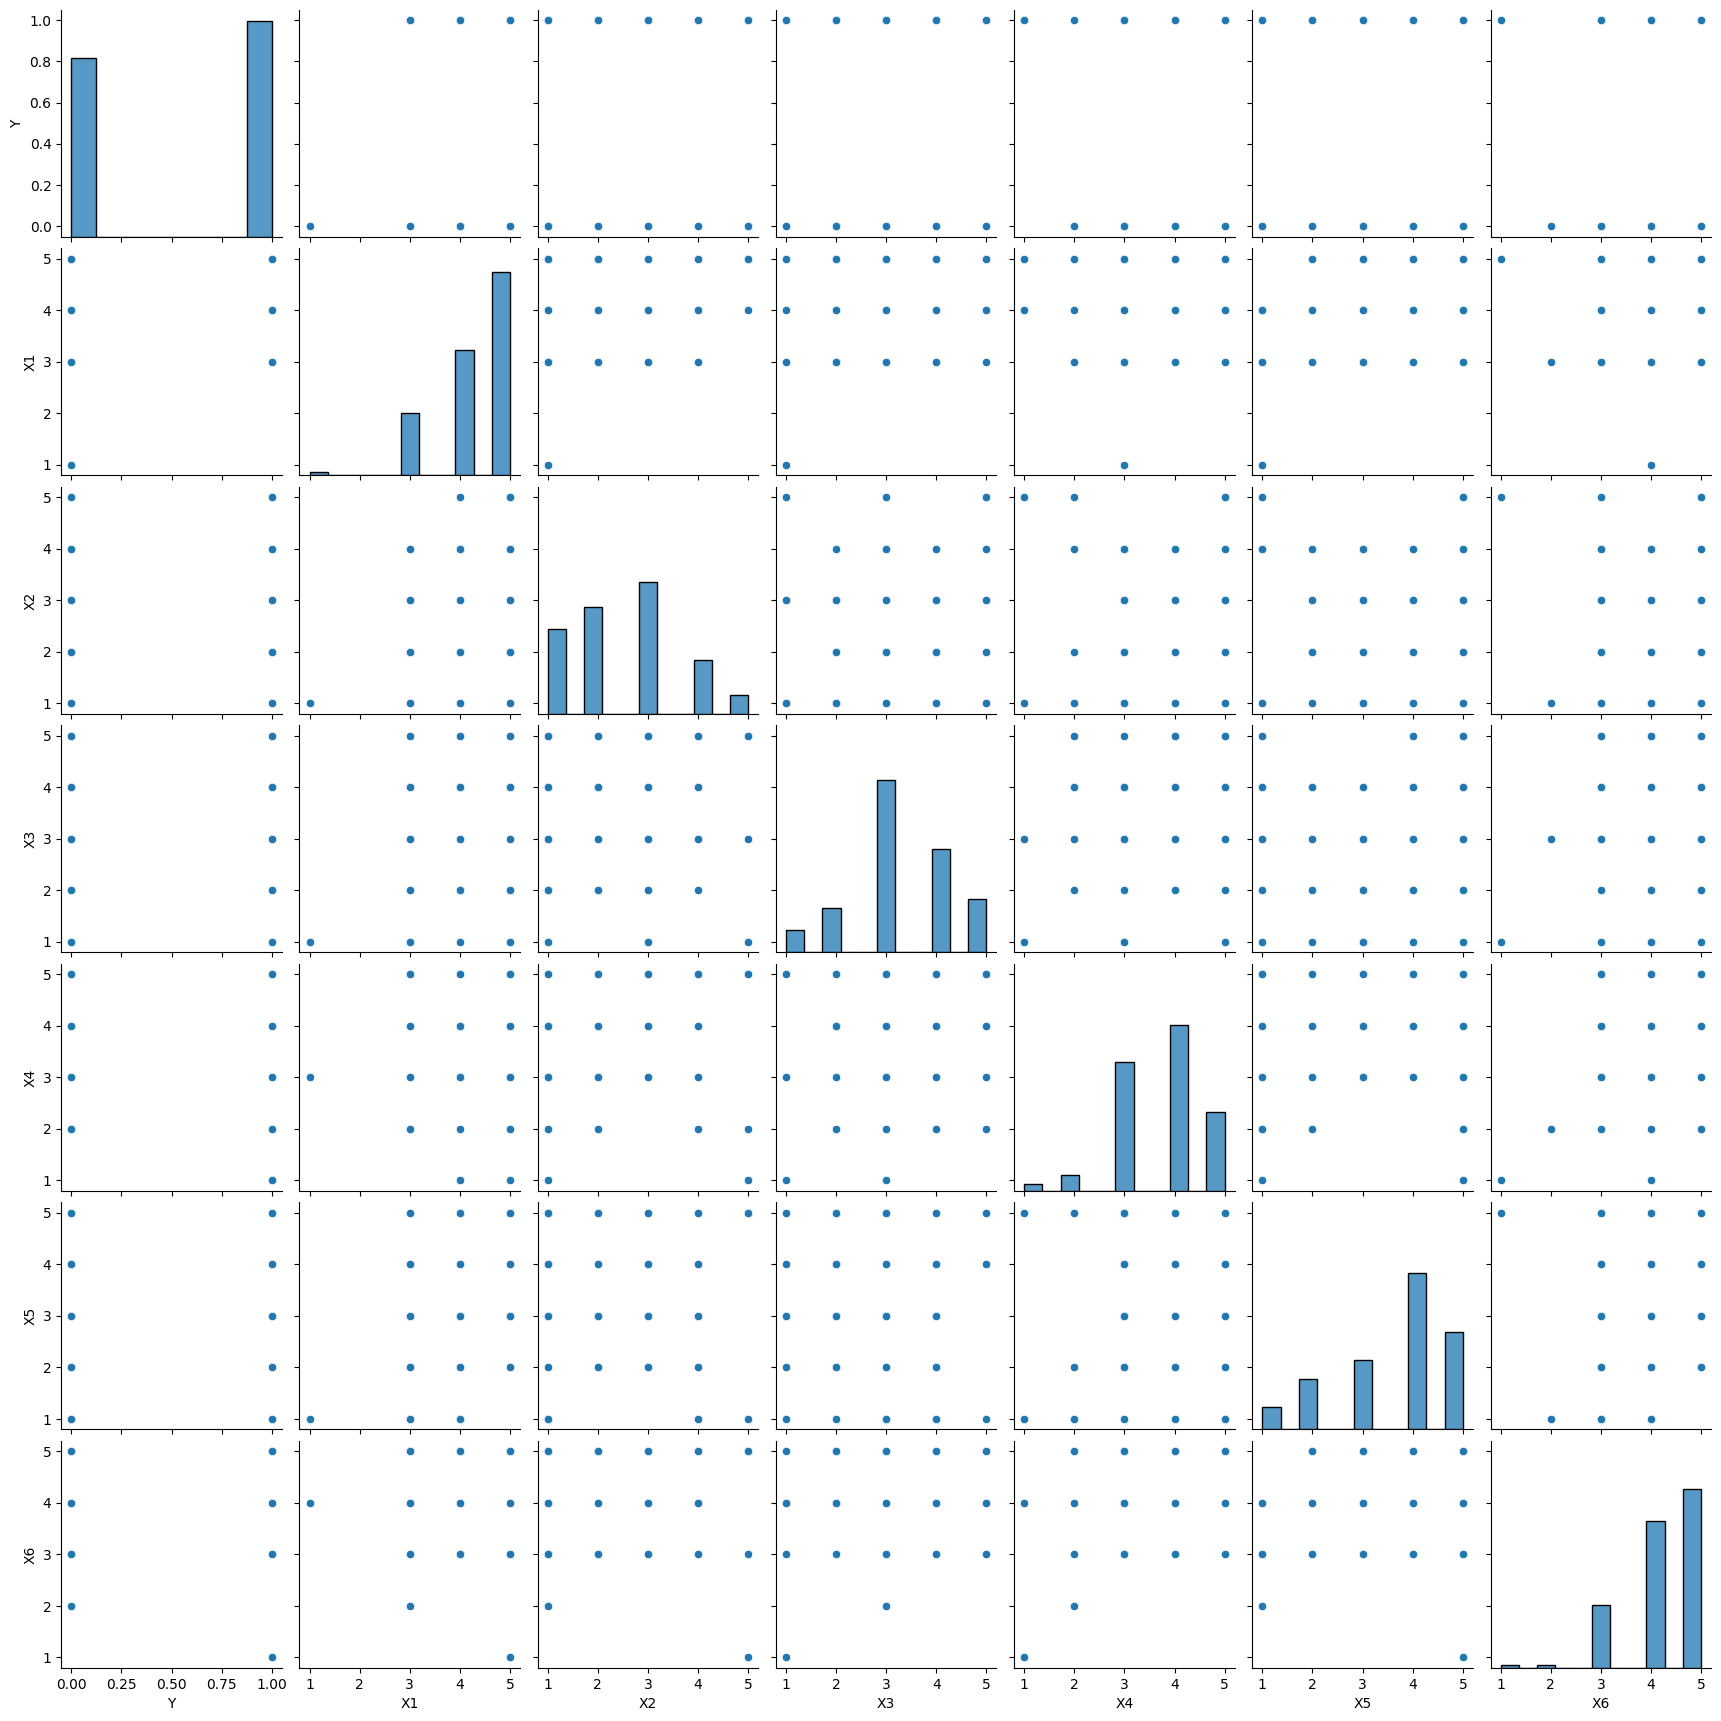

In [ ]:
# Visulization of the dataset, the visualization not really meaningful,
# The visualization did not show significant linear relationship.
sns.pairplot(data)
plt.show()

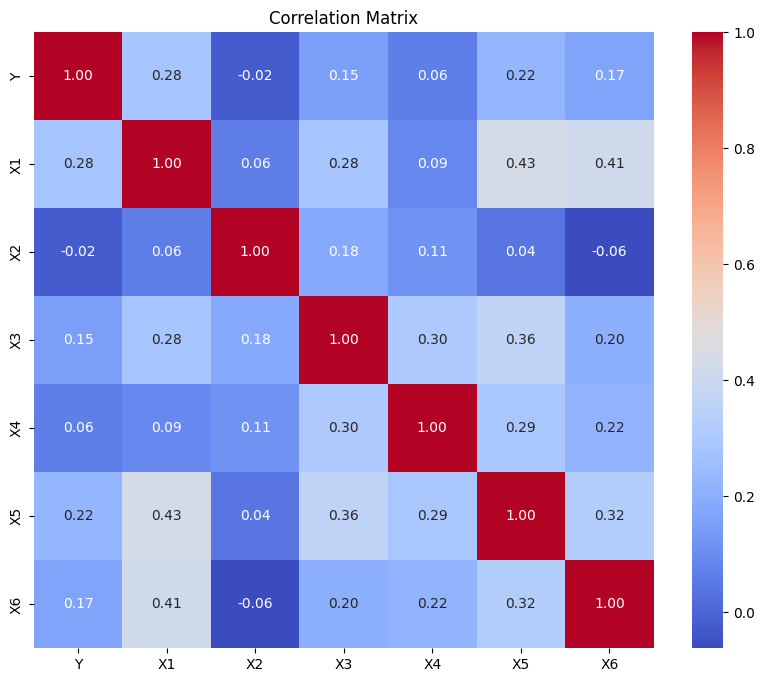

In [ ]:
# Correlation matrice, no specific correlation between feature variables and y
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

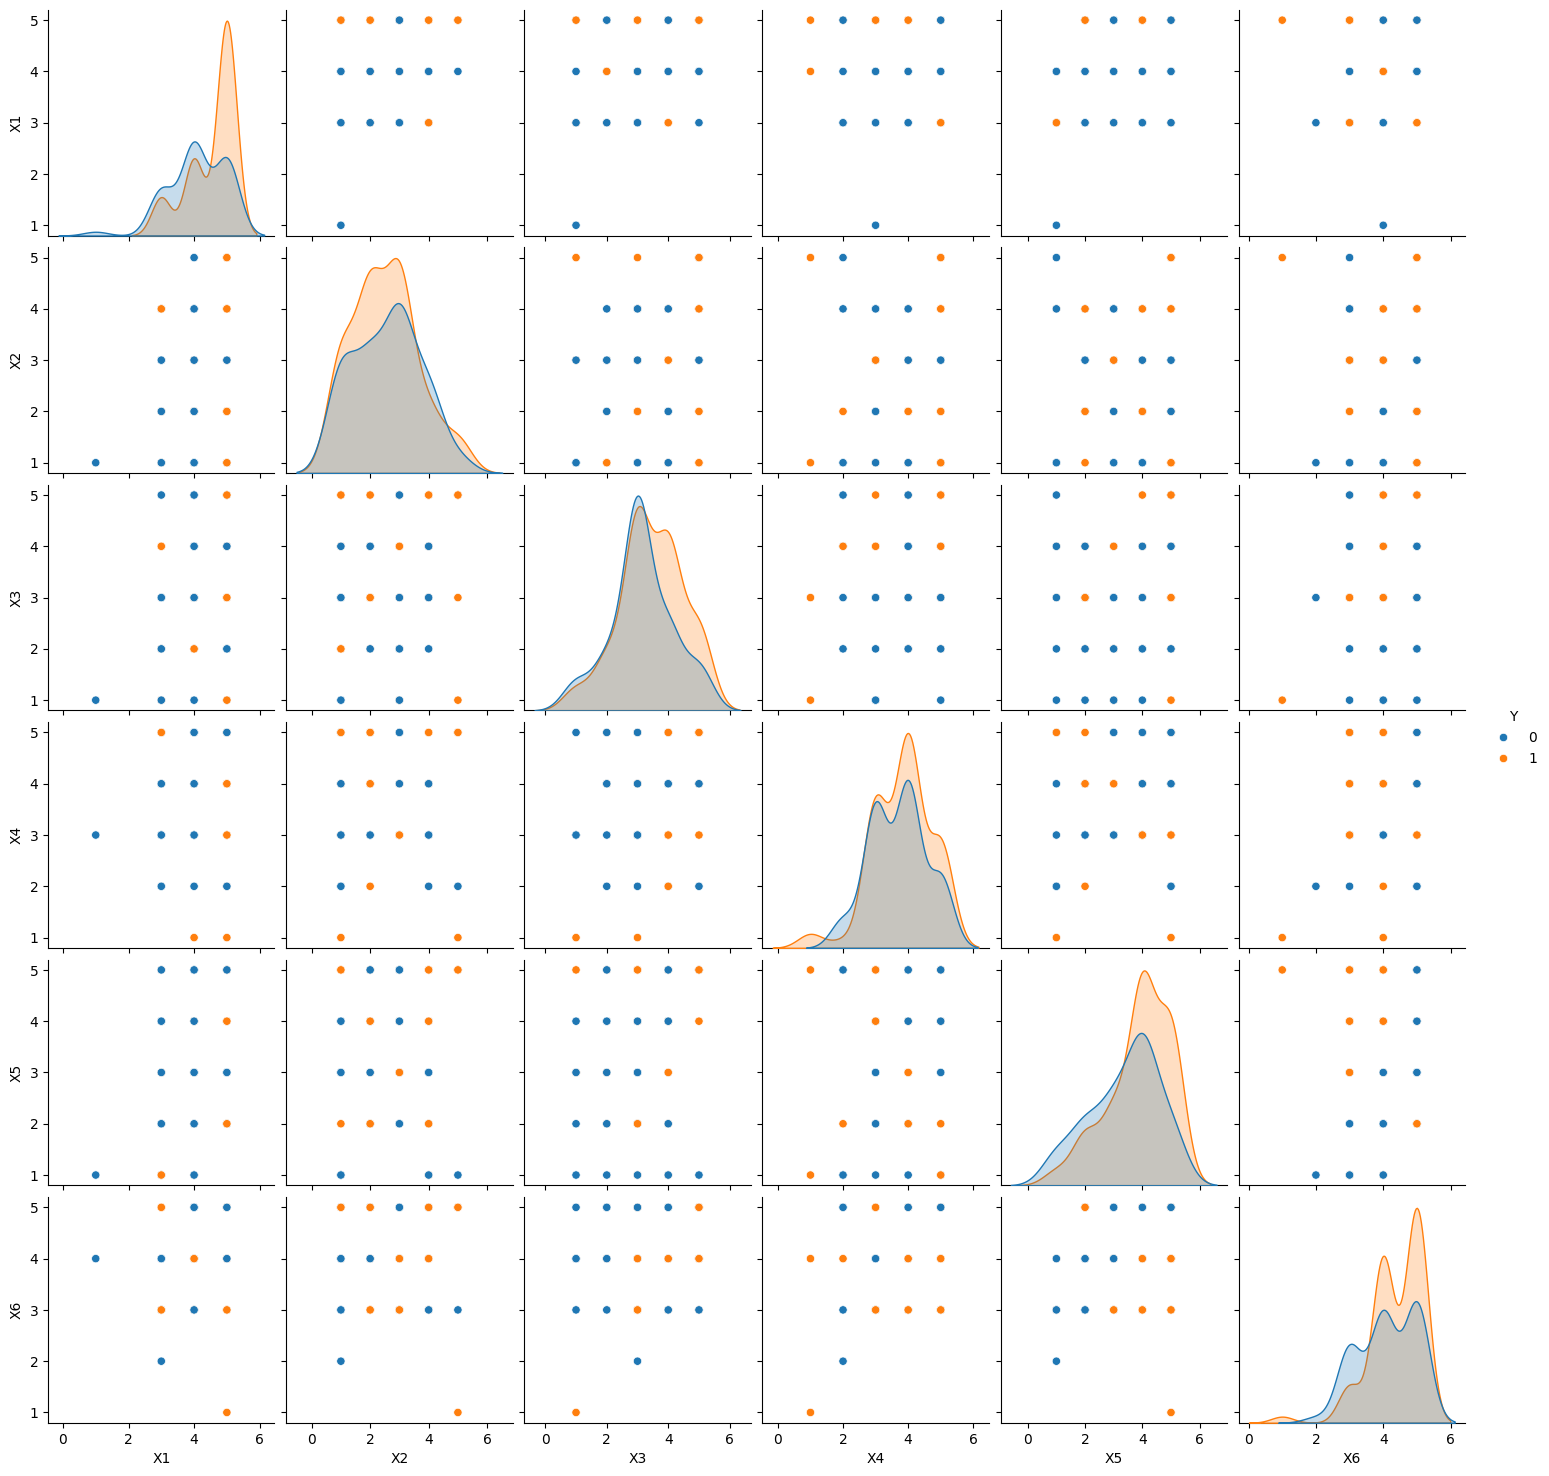

In [ ]:
sns.pairplot(data, hue='Y', diag_kind='kde')
plt.show()

In [12]:
# Split the data into features (X1 to X6) and target (Y)
x = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = data['Y']


In [13]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [15]:
# Using LogisticRegression as the classification algorithm and train
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
#Evaluate the model, the accuracy not that good, there may be bias because smaller testing dataset
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.62
Precision: 0.60
Recall: 0.86
F1-score: 0.71


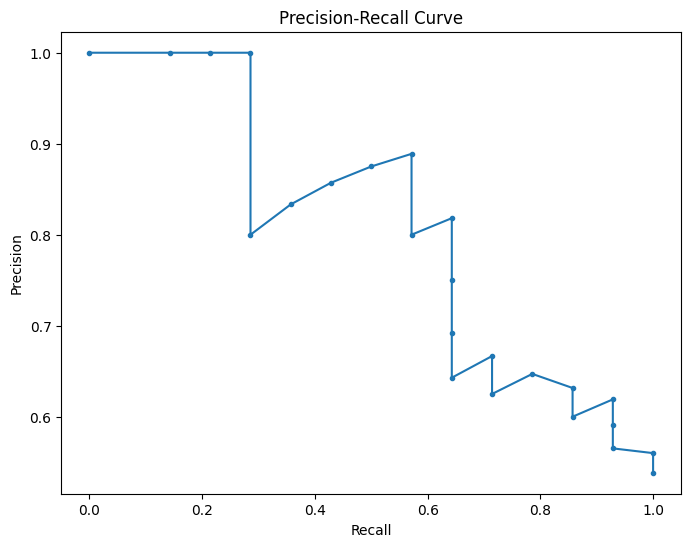

In [17]:
# Precision-Recall Curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

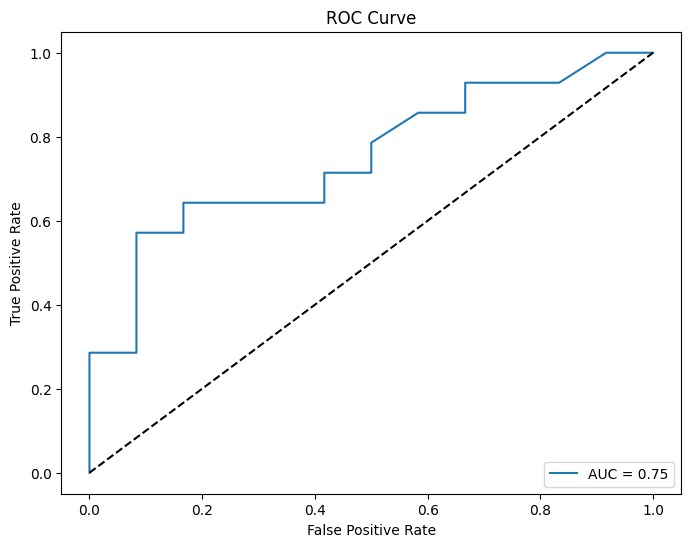

In [18]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
#Using K-fold method to split and evaluate the model
# Create the StratifiedKFold cross-validator
x_scaled = scaler.fit_transform(x)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

Cross-Validation Accuracy Scores: [0.57692308 0.56       0.56       0.64       0.56      ]
Mean Cross-Validation Accuracy: 0.58


In [20]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [21]:
# K-fold with pipeline as feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features

# Create a pipeline with feature selection and a model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('selector', selector),  # Feature selection
    ('classifier', LogisticRegression(random_state=42))  # Model
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline using cross-validation
cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

Cross-Validation Accuracy Scores: [0.61538462 0.48       0.56       0.6        0.52      ]
Mean Cross-Validation Accuracy: 0.56


In [22]:
# catboost feature selection model
from catboost import CatBoostClassifier, Pool

model_cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
model_cat.fit(x, y)
importances = model_cat.feature_importances_

# visualization
features = pd.DataFrame({'feature': x.columns, 'importance': importances})
features = features.sort_values(by='importance', ascending=False)
print(features)



0:	learn: 0.6838174	total: 46.3ms	remaining: 4.58s
1:	learn: 0.6750595	total: 47.4ms	remaining: 2.32s
2:	learn: 0.6652066	total: 48.1ms	remaining: 1.55s
3:	learn: 0.6567986	total: 48.5ms	remaining: 1.16s
4:	learn: 0.6502964	total: 49.1ms	remaining: 934ms
5:	learn: 0.6439977	total: 49.4ms	remaining: 774ms
6:	learn: 0.6377603	total: 49.8ms	remaining: 662ms
7:	learn: 0.6341102	total: 50.2ms	remaining: 577ms
8:	learn: 0.6282191	total: 50.6ms	remaining: 512ms
9:	learn: 0.6227698	total: 51.1ms	remaining: 460ms
10:	learn: 0.6196469	total: 51.6ms	remaining: 417ms
11:	learn: 0.6144777	total: 52ms	remaining: 381ms
12:	learn: 0.6110429	total: 52.5ms	remaining: 351ms
13:	learn: 0.6072683	total: 52.9ms	remaining: 325ms
14:	learn: 0.6034199	total: 53.4ms	remaining: 302ms
15:	learn: 0.6018328	total: 53.8ms	remaining: 282ms
16:	learn: 0.5969018	total: 54.2ms	remaining: 265ms
17:	learn: 0.5885844	total: 54.7ms	remaining: 249ms
18:	learn: 0.5836710	total: 55.1ms	remaining: 235ms
19:	learn: 0.5782725	tot

In [23]:
# xgboost feature selection
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

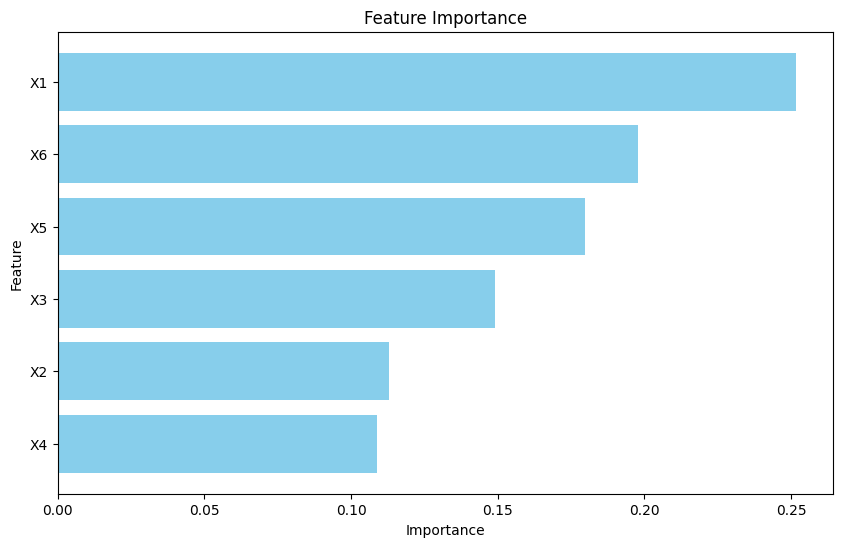

In [ ]:
# Sort the DataFrame by importance
importances = model_xgb.feature_importances_
features = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [24]:
# lightgbm feature selection
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(x, y)
importances = model_lgb.feature_importances_

# visualization
features = pd.DataFrame({'feature': x.columns, 'importance': importances})
features = features.sort_values(by='importance', ascending=False)
print(features)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 69, number of negative: 57
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547619 -> initscore=0.191055
[LightGBM] [Info] Start training from score 0.191055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [25]:
# decision tree feature selection model
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x, y)
importances = model_dt.feature_importances_

# visualization
features = pd.DataFrame({'feature': x.columns, 'importance': importances})
features = features.sort_values(by='importance', ascending=False)
print(features)

  feature  importance
4      X5    0.216981
0      X1    0.198075
2      X3    0.178844
1      X2    0.174610
5      X6    0.130269
3      X4    0.101220


In [44]:
# After compare feature selection models, feature X2 and X4 have high probability of useless feature
# The new model training will be discard these two features.

x_new = x.drop(columns=['X2', 'X4'])


In [45]:
# Split the new data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

# Train a CatBoost model after drop X2, X4
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42, verbose=0)
model.fit(x_train, y_train)

In [46]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.57
Recall: 0.73
F1-score: 0.64


In [47]:
# Train the XGBoost model after drop feature X2, X4
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')



Accuracy: 0.65
Precision: 0.57
Recall: 0.73
F1-score: 0.64


In [49]:
# Train lightgbm model after drop X2,X4
import lightgbm as lgb

# Convert the classic dataset into lightgbm dataset
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',            # Gradient Boosting Decision Tree
    'num_leaves': 8,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions
y_pred = model.predict(x_test)
y_pred = [np.argmax(pred) for pred in y_pred]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] Start training from score -0.867501
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.62
Precision: 0.54
Recall: 0.64
F1-score: 0.58


In [ ]:
# Conclusion after discard the two features X2 and X4, the model had improved the accuracy but not that much.
# The accuracy between 0.62-0.65 indicates moderate overall performance.
# A precision between 0.54-0.57 suggests that the model has a relatively high rate of false positives,
# meaning that nearly half of the positive predictions are incorrect.
# A recall between 0.64-0.73 indicates that the model is better at identifying actual positives, with a lower rate of false negatives.
# The F1-score between 0.58-0.64 indicates a balance between precision and recall,
# but it is somewhat closer to recall, given the higher recall value.